In [1]:
# Importing Libraries

In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
import time

In [4]:
import mediapipe as mp

In [5]:
import numpy as np

In [6]:
import threading

In [7]:
#@markdown To better demonstrate the Pose Landmarker API, we have created a set of visualization tools that will be used in this colab. These will draw the landmarks on a detect person, as well as the expected connections between those markers.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

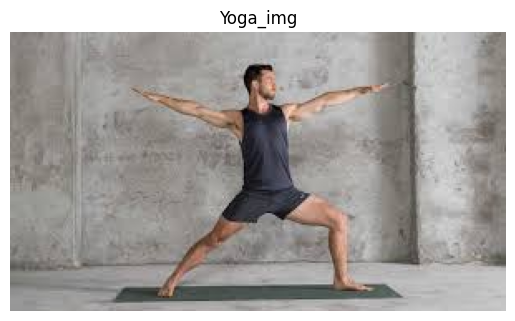

In [8]:
img = cv2.imread("img_yoga.jpeg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display in matplotlib

plt.imshow(img_rgb)
plt.title("Yoga_img")
plt.axis('off')
plt.show()

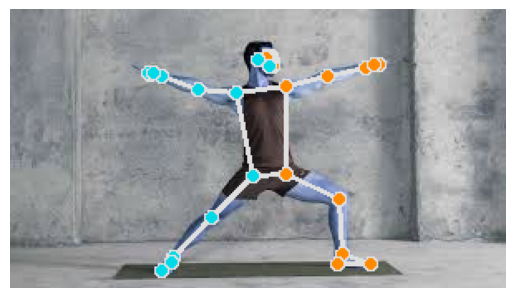

In [6]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path="pose_landmarker_full.task")

options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("img_yoga.jpeg")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))
plt.axis('off')
plt.show()

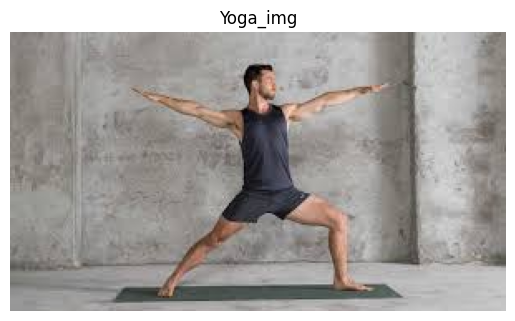

In [7]:
segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255

# Ensure it's uint8
img_rgb = img_rgb.astype('uint8')

plt.imshow(img_rgb)
plt.axis('off')
plt.title("Yoga_img")
plt.show()

(-0.5, 298.5, 167.5, -0.5)

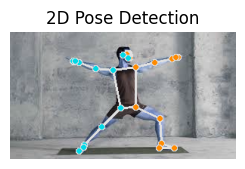

In [8]:
# 2D plot
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))
plt.title('2D Pose Detection')
plt.axis('off')


In [9]:
# connections for the MediaPipe topology
LANDMARK_GROUPS = [
    [8, 6, 5, 4, 0, 1, 2, 3, 7],   # eyes
    [10, 9],                       # mouth
    [11, 13, 15, 17, 19, 15, 21],  # right arm
    [11, 23, 25, 27, 29, 31, 27],  # right body side
    [12, 14, 16, 18, 20, 16, 22],  # left arm
    [12, 24, 26, 28, 30, 32, 28],  # left body side
    [11, 12],                      # shoulder
    [23, 24],                      # waist
]


def plot_world_landmarks(ax, landmarks, landmark_groups=LANDMARK_GROUPS):
    """_summary_
    Args:
        ax: plot axes
        landmarks  mediapipe
    """

    # skip when no landmarks are detected
    if landmarks is None:
        return

    ax.cla()

    # had to flip the z axis
    ax.set_xlim3d(-1, 1)
    ax.set_ylim3d(-1, 1)
    ax.set_zlim3d(1, -1)

    # get coordinates for each group and plot
    for group in landmark_groups:
        plotX, plotY, plotZ = [], [], []
        
        plotX = [landmarks[i].x for i in group]
        plotY = [landmarks[i].y for i in group]
        plotZ = [landmarks[i].z for i in group]

        # this can be changed according to your camera
        ax.plot(plotX, plotZ, plotY)

    plt.pause(.001)
    return

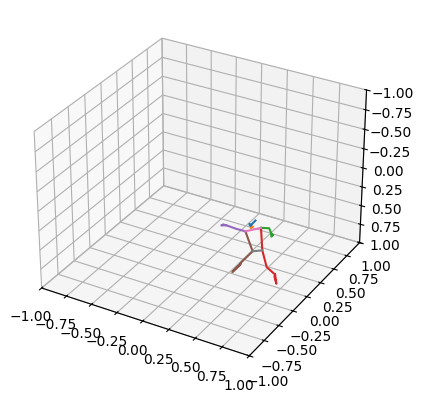

In [10]:

# setup plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Call your function here
plot_world_landmarks(ax, detection_result.pose_landmarks[0])


plt.show()

In [11]:
# Get POSE_CONNECTIONS from the classic solutions API
POSE_CONNECTIONS = mp.solutions.pose.POSE_CONNECTIONS

In [12]:
#setup mediapipe
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

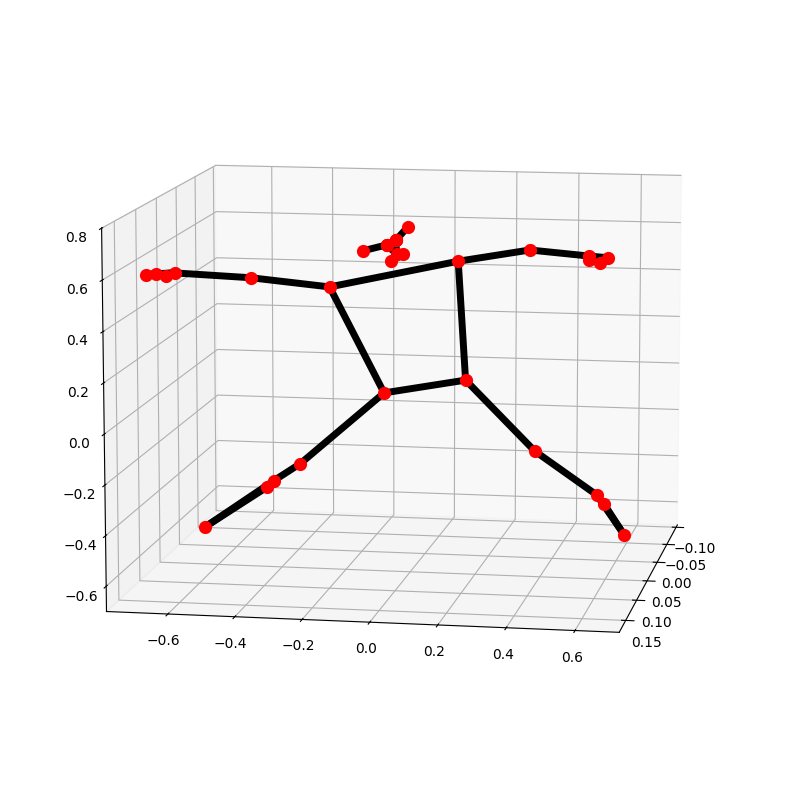

In [13]:
from mediapipe.framework.formats import landmark_pb2

def convert_to_landmark_list(landmarks):
    landmark_list = landmark_pb2.LandmarkList()  # Note: LandmarkList, not NormalizedLandmarkList
    for lm in landmarks:
        new_landmark = landmark_list.landmark.add()
        new_landmark.x = lm.x
        new_landmark.y = lm.y
        new_landmark.z = lm.z
        if hasattr(lm, 'visibility'):
            new_landmark.visibility = lm.visibility
        if hasattr(lm, 'presence'):
            new_landmark.presence = lm.presence
    return landmark_list

# Then use:
if detection_result.pose_world_landmarks:
    landmark_list = convert_to_landmark_list(detection_result.pose_world_landmarks[0])
    mp_drawing.plot_landmarks(landmark_list, POSE_CONNECTIONS)

In [16]:
# Creating the task

In [7]:
BaseOptions = mp.tasks.BaseOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
PoseLandmarkerResult = mp.tasks.vision.PoseLandmarkerResult
VisionRunningMode = mp.tasks.vision.RunningMode

# Create a pose landmarker instance with the live stream mode:
def print_result(result: PoseLandmarkerResult, output_image: mp.Image, timestamp_ms: int):
    print('pose landmarker result: {}'.format(result))

options = PoseLandmarkerOptions(
    base_options=BaseOptions(model_asset_path="pose_landmarker_full.task"),
    running_mode=VisionRunningMode.LIVE_STREAM,
    result_callback=print_result)


In [15]:
# Prepare data

In [8]:
# Correct:
detect = PoseLandmarker.create_from_options(options)

# open webcam 
cap = cv2.VideoCapture(1) # change index

# Use OpenCV’s VideoCapture to start capturing from the webcam.
while cap.isOpened():

        # Create a loop to read the latest frame from the camera using VideoCapture#read()
        # read webcam image
        success, image = cap.read()

        # skip empty frames
        if not success:
            continue

        # Convert the frame received from OpenCV to a MediaPipe’s Image object.
        # Correct:
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

       
        # Correct - you need to calculate frame_timestamp_ms:
        frame_timestamp_ms = int(time.time() * 1000)  # or use frame counter
        detection_result = detect.detect_async(mp_image, frame_timestamp_ms)
        
        print_result(detection_result)
        
        # # draw image
        # cv2.imshow("MediaPipePose", cv2.flip(image, 1))

        if cv2.waitKey(5) & 0xFF == 27:
            break
      
      
cap.release()

    

[INFO] Found 5 pose classes: ['chair', 'cobra', 'dog', 'tree', 'warrior']
[INFO] Dataset loaded successfully
[INFO] Training samples: 1188
[INFO] Testing samples: 298
[INFO] Features per sample: 132
[INFO] Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 246,789 (964.02 KB)

 Trainable params: 244,805 (956.27 KB)

 Non-trainable params: 1,984 (7.75 KB)

[INFO] Model training started...
Epoch 1/200
63/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3958 - loss: 1.7638
Epoch 1: val_accuracy improved from -inf to 0.76846, saving model to yoga_model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4167 - loss: 1.6923 - val_accuracy: 0.7685 - val_loss: 0.9760
Epoch 2/200
69/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7151 - loss: 0.7696
Epoch 2: val_accuracy improved from 0.76846 to 0.88255, saving model to yoga_model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7171 - loss: 0.7661 - val_accuracy: 0.8826 - val_loss: 0.5206
Epoch 3/200
70/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8086 - loss: 0.5790
Epoch 3: val_accuracy improved from 0.88255 to 0.91611, saving model to yoga_model.keras
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8088 - loss: 0.5766 - val_accuracy: 0.9161 - val_loss: 0.2985
Epoch 4/200
70/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8551 - loss: 0.4429
Epoch 4: val_accur

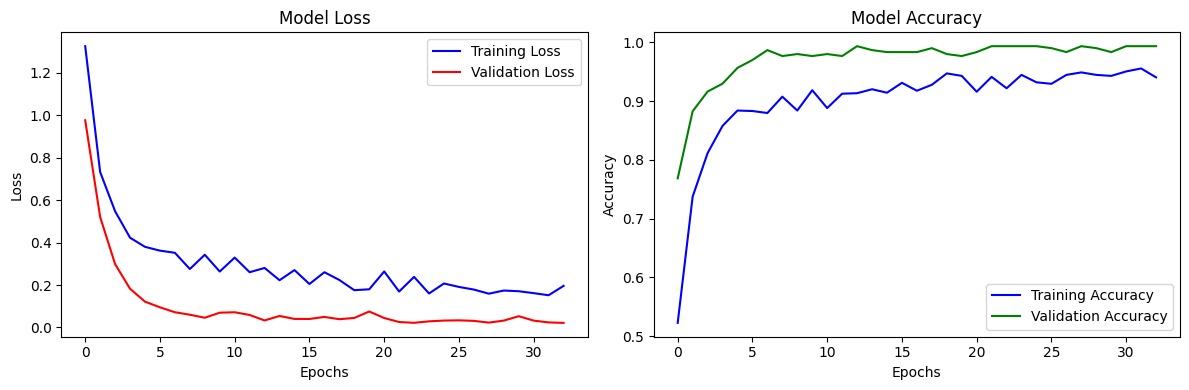

[INFO] Training metrics plot saved as metrics.png

[RESULTS] Training Summary:
Best Training Accuracy: 0.9554
Best Validation Accuracy: 0.9933
Best Training Loss: 0.1519
Best Validation Loss: 0.0217
Total Epochs Trained: 33


In [15]:
import keras
import pandas as pd
from keras import layers, Sequential
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import os

# ==== CONFIGURATION ====
path_csv = "yoga_poses.csv"  # Update this path to your CSV file
path_to_save = "yoga_model.keras"    # Update this path for saving the model
# ========================

# Load .csv Data
df = pd.read_csv(path_csv)
class_list = df['Pose_Class'].unique()
class_list = sorted(class_list)
class_number = len(class_list)

print(f'[INFO] Found {class_number} pose classes: {class_list}')

# Create training and validation splits
x = df.copy()
y = x.pop('Pose_Class')
y, _ = y.factorize()
x = x.astype('float64')
y = keras.utils.to_categorical(y)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=0)

print(f'[INFO] Dataset loaded successfully')
print(f'[INFO] Training samples: {x_train.shape[0]}')
print(f'[INFO] Testing samples: {x_test.shape[0]}')
print(f'[INFO] Features per sample: {x_train.shape[1]}')

# Create the model
model = Sequential([
    # Input layer
    layers.Input(shape=(x_train.shape[1],)),
    
    # First dense block
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    # Second dense block
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    # Third dense block
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    
    # Fourth dense block
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    # Fifth dense block (optional - can be removed if overfitting)
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.15),
    
    # Output layer
    layers.Dense(class_number, activation="softmax")
])


# Model Summary
print('[INFO] Model Architecture:')
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Add callbacks
checkpoint_path = path_to_save
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path,
                                             monitor='val_accuracy',
                                             verbose=1,
                                             save_best_only=True,
                                             mode='max')

earlystopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                              patience=20,
                                              verbose=1)

print('[INFO] Model training started...')

# Start training
history = model.fit(x_train, y_train,
                    epochs=200,
                    batch_size=16,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint, earlystopping],
                    verbose=1)

print('[INFO] Model training completed')
print(f'[INFO] Model successfully saved as {path_to_save}')

# Plot training history
metric_loss = history.history['loss']
metric_val_loss = history.history['val_loss']
metric_accuracy = history.history['accuracy']
metric_val_accuracy = history.history['val_accuracy']

# Construct epochs range
epochs = range(len(metric_loss))

# Create subplots for better visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot loss
ax1.plot(epochs, metric_loss, 'blue', label='Training Loss')
ax1.plot(epochs, metric_val_loss, 'red', label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot accuracy
ax2.plot(epochs, metric_accuracy, 'blue', label='Training Accuracy')
ax2.plot(epochs, metric_val_accuracy, 'green', label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Save the plot
plt.tight_layout()
if os.path.exists('metrics.png'):
    os.remove('metrics.png')
plt.savefig('metrics.png', bbox_inches='tight', dpi=300)
plt.show()

print('[INFO] Training metrics plot saved as metrics.png')

# Print final training results
final_train_acc = max(metric_accuracy)
final_val_acc = max(metric_val_accuracy)
final_train_loss = min(metric_loss)
final_val_loss = min(metric_val_loss)

print(f'\n[RESULTS] Training Summary:')
print(f'Best Training Accuracy: {final_train_acc:.4f}')
print(f'Best Validation Accuracy: {final_val_acc:.4f}')
print(f'Best Training Loss: {final_train_loss:.4f}')
print(f'Best Validation Loss: {final_val_loss:.4f}')
print(f'Total Epochs Trained: {len(epochs)}')

In [16]:
import cv2
import mediapipe as mp
import numpy as np
import time
import keras
import pandas as pd
import math

# ==== CONFIGURATION ====
model_path = "yoga_model.keras"
class_names = ['Chair', 'Cobra', 'Dog', 'Tree', 'Warrior']
threshold = 0.8
torso_size_multiplier = 2.5

# ==== LOAD MODEL ====
print("Loading yoga pose model...")
try:
    model = keras.models.load_model(model_path)
    print(f"✓ Model loaded successfully")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    exit()

# ==== MEDIAPIPE SETUP ====
BaseOptions = mp.tasks.BaseOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
PoseLandmarkerResult = mp.tasks.vision.PoseLandmarkerResult
VisionRunningMode = mp.tasks.vision.RunningMode

# Drawing utilities for visualization
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

# ==== POSE LANDMARK CLASS ====
class PoseLandmark:
    def __init__(self, x, y, z, visibility):
        self.x = x
        self.y = y 
        self.z = z
        self.visibility = visibility

# ==== COLUMN NAMES FOR MODEL ====
col_names = []
for i in range(33):
    landmark_name = f"LANDMARK_{i}"
    col_names.extend([f"{landmark_name}_X", f"{landmark_name}_Y", 
                      f"{landmark_name}_Z", f"{landmark_name}_V"])

# ==== NORMALIZATION FUNCTION ====
def normalize_landmarks(landmarks):
    """Normalize landmarks using the same method as training"""
    
    # Get key landmark indices
    left_hip_idx = 23
    right_hip_idx = 24  
    left_shoulder_idx = 11
    right_shoulder_idx = 12
    
    # Calculate center point (hip midpoint)
    center_x = (landmarks[right_hip_idx].x + landmarks[left_hip_idx].x) * 0.5
    center_y = (landmarks[right_hip_idx].y + landmarks[left_hip_idx].y) * 0.5
    
    # Calculate shoulder midpoint
    shoulders_x = (landmarks[right_shoulder_idx].x + landmarks[left_shoulder_idx].x) * 0.5
    shoulders_y = (landmarks[right_shoulder_idx].y + landmarks[left_shoulder_idx].y) * 0.5
    
    # Calculate max distance for normalization
    max_distance = max(
        max(math.sqrt((lm.x - center_x) ** 2 + (lm.y - center_y) ** 2) for lm in landmarks),
        math.sqrt((shoulders_x - center_x) ** 2 + (shoulders_y - center_y) ** 2) * torso_size_multiplier
    )
    
    # Normalize all landmarks
    normalized_features = []
    for lm in landmarks:
        norm_x = (lm.x - center_x) / max_distance
        norm_y = (lm.y - center_y) / max_distance
        norm_z = lm.z / max_distance
        visibility = lm.visibility
        normalized_features.extend([norm_x, norm_y, norm_z, visibility])
    
    return normalized_features

# ==== PREDICTION FUNCTION ====
def predict_pose_from_landmarks(landmarks_data, model, class_names, threshold=0.8):
    """Predict yoga pose from 33 landmarks"""
    
    try:
        # Normalize landmarks
        normalized_data = normalize_landmarks(landmarks_data)
        
        # Create DataFrame
        input_df = pd.DataFrame([normalized_data], columns=col_names)
        
        # Make prediction
        predictions = model.predict(input_df, verbose=0)[0]
        max_confidence = max(predictions)
        predicted_class_idx = np.argmax(predictions)
        predicted_class = class_names[predicted_class_idx]
        
        # Apply threshold
        if max_confidence < threshold:
            predicted_class = "Unknown Pose"
        
        return {
            'predicted_class': predicted_class,
            'confidence': max_confidence,
            'all_probabilities': dict(zip(class_names, predictions)),
            'accepted': max_confidence >= threshold
        }
    except Exception as e:
        print(f"Prediction error: {e}")
        return {
            'predicted_class': "Error",
            'confidence': 0.0,
            'accepted': False
        }

# ==== LANDMARK EXTRACTION ====
def extract_landmarks_to_array(detection_result):
    """Extract 33 pose landmarks with x, y, z, visibility"""
    if detection_result.pose_landmarks:
        pose_landmarks = detection_result.pose_landmarks[0]
        landmarks_array = []
        for landmark in pose_landmarks:
            landmarks_array.extend([landmark.x, landmark.y, landmark.z, landmark.visibility])
        return np.array(landmarks_array)
    else:
        return None

# ==== CUSTOM DRAWING FUNCTION ====
def draw_pose_landmarks_custom(image, pose_landmarks):
    """Custom function to draw pose landmarks compatible with new MediaPipe API"""
    if not pose_landmarks:
        return image
    
    height, width = image.shape[:2]
    
    # Define pose connections (same as MediaPipe POSE_CONNECTIONS)
    pose_connections = [
        # Face
        (0, 1), (1, 2), (2, 3), (3, 7), (0, 4), (4, 5), (5, 6), (6, 8),
        (9, 10),
        # Upper body
        (11, 12), (11, 13), (13, 15), (15, 17), (15, 19), (15, 21), (17, 19),
        (12, 14), (14, 16), (16, 18), (16, 20), (16, 22), (18, 20),
        (11, 23), (12, 24), (23, 24),
        # Lower body  
        (23, 25), (25, 27), (27, 29), (27, 31), (29, 31),
        (24, 26), (26, 28), (28, 30), (28, 32), (30, 32)
    ]
    
    # Convert normalized coordinates to pixel coordinates
    points = []
    for landmark in pose_landmarks:
        x = int(landmark.x * width)
        y = int(landmark.y * height)
        points.append((x, y))
    
    # Draw connections
    for connection in pose_connections:
        start_idx, end_idx = connection
        if start_idx < len(points) and end_idx < len(points):
            start_point = points[start_idx]
            end_point = points[end_idx]
            cv2.line(image, start_point, end_point, (255, 255, 255), 2)  # White lines
    
    # Draw landmarks
    for i, point in enumerate(points):
        # Blue dots for all landmarks
        cv2.circle(image, point, 4, (255, 0, 0), -1)  # Blue filled circle
        cv2.circle(image, point, 4, (255, 255, 255), 1)  # White border
    
    return image

# ==== GLOBAL VARIABLES ====
latest_detection_result = None
latest_landmarks = None

# ==== CALLBACK FUNCTION ====
def result_callback(detection_result: PoseLandmarkerResult, output_image: mp.Image, timestamp_ms: int):
    """Callback function for pose detection results"""
    global latest_detection_result, latest_landmarks
    latest_detection_result = detection_result
    latest_landmarks = extract_landmarks_to_array(detection_result)

# ==== MEDIAPIPE SETUP ====
options = PoseLandmarkerOptions(
    base_options=BaseOptions(model_asset_path="pose_landmarker_full.task"),
    running_mode=VisionRunningMode.LIVE_STREAM,
    result_callback=result_callback
)

try:
    detector = PoseLandmarker.create_from_options(options)
    print("✓ MediaPipe pose detector initialized")
except Exception as e:
    print(f"❌ Error initializing MediaPipe: {e}")
    exit()

# ==== MAIN LOOP ====
print("Starting webcam... Press ESC to exit")
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("❌ Error: Could not open webcam")
    exit()

while cap.isOpened():
    success, image = cap.read()
    if not success:
        print("Failed to read from webcam")
        continue
    
    # Flip image for selfie view
    image = cv2.flip(image, 1)
    image_height, image_width = image.shape[:2]
    
    # Convert BGR to RGB for MediaPipe
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_image)
    
    # Get timestamp
    timestamp_ms = int(time.time() * 1000)
    
    # Detect pose asynchronously
    detector.detect_async(mp_image, timestamp_ms)
    
    # Draw pose landmarks if available
    if latest_detection_result and latest_detection_result.pose_landmarks:
        # Draw pose landmarks using custom function
        pose_landmarks = latest_detection_result.pose_landmarks[0]
        image = draw_pose_landmarks_custom(image, pose_landmarks)
        
        # Make yoga pose prediction
        if latest_landmarks is not None:
            # Convert to PoseLandmark objects
            landmarks_objects = []
            for i in range(0, len(latest_landmarks), 4):
                landmarks_objects.append(PoseLandmark(
                    latest_landmarks[i], 
                    latest_landmarks[i+1], 
                    latest_landmarks[i+2], 
                    latest_landmarks[i+3]
                ))
            
            # Predict pose
            result = predict_pose_from_landmarks(landmarks_objects, model, class_names, threshold)
            
            # Draw prediction results
            pose_name = result['predicted_class']
            confidence = result['confidence']
            
            # Background rectangle for text
            cv2.rectangle(image, (10, 10), (400, 80), (0, 0, 0), -1)
            
            # Draw text
            cv2.putText(image, f"Pose: {pose_name}", (15, 35), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
            cv2.putText(image, f"Confidence: {confidence:.1%}", (15, 65), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            
            # Change color based on confidence
            color = (0, 255, 0) if result['accepted'] else (0, 0, 255)
            cv2.rectangle(image, (10, 10), (400, 80), color, 2)
    
    else:
        # No pose detected
        cv2.putText(image, "No pose detected", (15, 35), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    
    # Display the image
    cv2.imshow("Yoga Pose Detection", image)
    
    # Break on ESC key
    if cv2.waitKey(5) & 0xFF == 27:
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()
print("✓ Application closed")

Loading yoga pose model...
✓ Model loaded successfully
✓ MediaPipe pose detector initialized
Starting webcam... Press ESC to exit
✓ Application closed


In [20]:
import cv2
import mediapipe as mp
import numpy as np
import time
import keras
import pandas as pd
import math

# ==== CONFIGURATION ====
model_path = "yoga_model.keras"
class_names = ['Chair', 'Cobra', 'Dog', 'Tree', 'Warrior']
threshold = 0.8
torso_size_multiplier = 2.5

# ==== LOAD MODEL ====
print("Loading yoga pose model...")
try:
    model = keras.models.load_model(model_path)
    print(f"✓ Model loaded successfully")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    exit()

# ==== MEDIAPIPE SETUP ====
BaseOptions = mp.tasks.BaseOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
PoseLandmarkerResult = mp.tasks.vision.PoseLandmarkerResult
VisionRunningMode = mp.tasks.vision.RunningMode

# Drawing utilities for visualization
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

# ==== POSE LANDMARK CLASS ====
class PoseLandmark:
    def __init__(self, x, y, z, visibility):
        self.x = x
        self.y = y 
        self.z = z
        self.visibility = visibility

# ==== COLUMN NAMES FOR MODEL ====
col_names = []
for i in range(33):
    landmark_name = f"LANDMARK_{i}"
    col_names.extend([f"{landmark_name}_X", f"{landmark_name}_Y", 
                      f"{landmark_name}_Z", f"{landmark_name}_V"])

# ==== NORMALIZATION FUNCTION ====
def normalize_landmarks(landmarks):
    """Normalize landmarks using the same method as training"""
    
    # Get key landmark indices
    left_hip_idx = 23
    right_hip_idx = 24  
    left_shoulder_idx = 11
    right_shoulder_idx = 12
    
    # Calculate center point (hip midpoint)
    center_x = (landmarks[right_hip_idx].x + landmarks[left_hip_idx].x) * 0.5
    center_y = (landmarks[right_hip_idx].y + landmarks[left_hip_idx].y) * 0.5
    
    # Calculate shoulder midpoint
    shoulders_x = (landmarks[right_shoulder_idx].x + landmarks[left_shoulder_idx].x) * 0.5
    shoulders_y = (landmarks[right_shoulder_idx].y + landmarks[left_shoulder_idx].y) * 0.5
    
    # Calculate max distance for normalization
    max_distance = max(
        max(math.sqrt((lm.x - center_x) ** 2 + (lm.y - center_y) ** 2) for lm in landmarks),
        math.sqrt((shoulders_x - center_x) ** 2 + (shoulders_y - center_y) ** 2) * torso_size_multiplier
    )
    
    # Normalize all landmarks
    normalized_features = []
    for lm in landmarks:
        norm_x = (lm.x - center_x) / max_distance
        norm_y = (lm.y - center_y) / max_distance
        norm_z = lm.z / max_distance
        visibility = lm.visibility
        normalized_features.extend([norm_x, norm_y, norm_z, visibility])
    
    return normalized_features

# ==== PREDICTION FUNCTION ====
def predict_pose_from_landmarks(landmarks_data, model, class_names, threshold=0.8):
    """Predict yoga pose from 33 landmarks"""
    
    try:
        # Normalize landmarks
        normalized_data = normalize_landmarks(landmarks_data)
        
        # Create DataFrame
        input_df = pd.DataFrame([normalized_data], columns=col_names)
        
        # Make prediction
        predictions = model.predict(input_df, verbose=0)[0]
        max_confidence = max(predictions)
        predicted_class_idx = np.argmax(predictions)
        predicted_class = class_names[predicted_class_idx]
        
        # Apply threshold
        if max_confidence < threshold:
            predicted_class = "Unknown Pose"
        
        return {
            'predicted_class': predicted_class,
            'confidence': max_confidence,
            'all_probabilities': dict(zip(class_names, predictions)),
            'accepted': max_confidence >= threshold
        }
    except Exception as e:
        print(f"Prediction error: {e}")
        return {
            'predicted_class': "Error",
            'confidence': 0.0,
            'accepted': False
        }

# ==== LANDMARK EXTRACTION ====
def extract_landmarks_to_array(detection_result):
    """Extract 33 pose landmarks with x, y, z, visibility"""
    if detection_result.pose_landmarks:
        pose_landmarks = detection_result.pose_landmarks[0]
        landmarks_array = []
        for landmark in pose_landmarks:
            landmarks_array.extend([landmark.x, landmark.y, landmark.z, landmark.visibility])
        return np.array(landmarks_array)
    else:
        return None

# ==== CUSTOM DRAWING FUNCTION ====
def draw_pose_landmarks_custom(image, pose_landmarks):
    """Custom function to draw pose landmarks compatible with new MediaPipe API"""
    if not pose_landmarks:
        return image
    
    height, width = image.shape[:2]
    
    # Define pose connections (same as MediaPipe POSE_CONNECTIONS)
    pose_connections = [
        # Face
        (0, 1), (1, 2), (2, 3), (3, 7), (0, 4), (4, 5), (5, 6), (6, 8),
        (9, 10),
        # Upper body
        (11, 12), (11, 13), (13, 15), (15, 17), (15, 19), (15, 21), (17, 19),
        (12, 14), (14, 16), (16, 18), (16, 20), (16, 22), (18, 20),
        (11, 23), (12, 24), (23, 24),
        # Lower body  
        (23, 25), (25, 27), (27, 29), (27, 31), (29, 31),
        (24, 26), (26, 28), (28, 30), (28, 32), (30, 32)
    ]
    
    # Convert normalized coordinates to pixel coordinates
    points = []
    for landmark in pose_landmarks:
        x = int(landmark.x * width)
        y = int(landmark.y * height)
        points.append((x, y))
    
    # Draw connections
    for connection in pose_connections:
        start_idx, end_idx = connection
        if start_idx < len(points) and end_idx < len(points):
            start_point = points[start_idx]
            end_point = points[end_idx]
            cv2.line(image, start_point, end_point, (255, 255, 255), 2)  # White lines
    
    # Draw landmarks
    for i, point in enumerate(points):
        # Blue dots for all landmarks
        cv2.circle(image, point, 4, (255, 0, 0), -1)  # Blue filled circle
        cv2.circle(image, point, 4, (255, 255, 255), 1)  # White border
    
    return image

# ==== GLOBAL VARIABLES ====
latest_detection_result = None
latest_landmarks = None

# ==== CALLBACK FUNCTION ====
def result_callback(detection_result: PoseLandmarkerResult, output_image: mp.Image, timestamp_ms: int):
    """Callback function for pose detection results"""
    global latest_detection_result, latest_landmarks
    latest_detection_result = detection_result
    latest_landmarks = extract_landmarks_to_array(detection_result)

# ==== MEDIAPIPE SETUP ====
options = PoseLandmarkerOptions(
    base_options=BaseOptions(model_asset_path="pose_landmarker_full.task"),
    running_mode=VisionRunningMode.LIVE_STREAM,
    result_callback=result_callback
)

try:
    detector = PoseLandmarker.create_from_options(options)
    print("✓ MediaPipe pose detector initialized")
except Exception as e:
    print(f"❌ Error initializing MediaPipe: {e}")
    exit()

# ==== INITIALIZE VIDEO CAPTURE FIRST ====
print("Initializing video capture...")
cap = cv2.VideoCapture("8084491-uhd_3840_2160_25fps.mp4")

if not cap.isOpened():
    print("❌ Error: Could not open video file")
    exit()

# ==== VIDEO WRITER SETUP (AFTER cap is initialized) ====
# Get video properties from the opened video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Validate video properties
if frame_width == 0 or frame_height == 0 or fps == 0:
    print(f"❌ Error: Invalid video properties - Width: {frame_width}, Height: {frame_height}, FPS: {fps}")
    cap.release()
    exit()

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can also try 'XVID'
output_filename = "yoga_pose_detection_output.mp4"
out = cv2.VideoWriter(output_filename, fourcc, fps, (frame_width, frame_height))

# Check if VideoWriter was initialized successfully
if not out.isOpened():
    print("❌ Error: Could not initialize video writer")
    print("Trying alternative codec...")
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    output_filename = "yoga_pose_detection_output.avi"
    out = cv2.VideoWriter(output_filename, fourcc, fps, (frame_width, frame_height))
    
    if not out.isOpened():
        print("❌ Error: Video writer initialization failed with both codecs")
        cap.release()
        exit()

print(f"✓ Video writer initialized - Output: {output_filename}")
print(f"  Resolution: {frame_width}x{frame_height}")
print(f"  FPS: {fps}")
print(f"  Total frames: {total_frames}")

# ==== MAIN PROCESSING LOOP ====
print("Starting video processing... Press ESC to exit")
frame_count = 0

while cap.isOpened():
    success, image = cap.read()
    if not success:
        print("End of video or failed to read frame")
        break
    
    frame_count += 1
    
    # Show progress every 30 frames
    if frame_count % 30 == 0:
        progress = (frame_count / total_frames) * 100
        print(f"Processing frame {frame_count}/{total_frames} ({progress:.1f}%)")
    
    image_height, image_width = image.shape[:2]
    
    # Convert BGR to RGB for MediaPipe
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_image)
    
    # Get timestamp
    timestamp_ms = int(time.time() * 1000)
    
    # Detect pose asynchronously
    detector.detect_async(mp_image, timestamp_ms)
    
    # Draw pose landmarks if available
    if latest_detection_result and latest_detection_result.pose_landmarks:
        # Draw pose landmarks using custom function
        pose_landmarks = latest_detection_result.pose_landmarks[0]
        image = draw_pose_landmarks_custom(image, pose_landmarks)
        
        # Make yoga pose prediction
        if latest_landmarks is not None:
            # Convert to PoseLandmark objects
            landmarks_objects = []
            for i in range(0, len(latest_landmarks), 4):
                landmarks_objects.append(PoseLandmark(
                    latest_landmarks[i], 
                    latest_landmarks[i+1], 
                    latest_landmarks[i+2], 
                    latest_landmarks[i+3]
                ))
            
            # Predict pose
            result = predict_pose_from_landmarks(landmarks_objects, model, class_names, threshold)
            
            # Draw prediction results
            pose_name = result['predicted_class']
            confidence = result['confidence']
            
            # Background rectangle for text
            cv2.rectangle(image, (10, 10), (400, 80), (0, 0, 0), -1)
            
            # Draw text
            cv2.putText(image, f"Pose: {pose_name}", (15, 35), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
            cv2.putText(image, f"Confidence: {confidence:.1%}", (15, 65), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            
            # Change color based on confidence
            color = (0, 255, 0) if result['accepted'] else (0, 0, 255)
            cv2.rectangle(image, (10, 10), (400, 80), color, 2)
    
    else:
        # No pose detected
        cv2.putText(image, "No pose detected", (15, 35), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    
    # Write the frame to output video
    out.write(image)
    
    # Display the image (optional - comment out for faster processing)
    cv2.imshow("Yoga Pose Detection", image)
    
    # Break on ESC key
    if cv2.waitKey(1) & 0xFF == 27:
        break

# Cleanup
cap.release()
out.release()  # Don't forget to release the video writer
cv2.destroyAllWindows()

# Verify output file
import os
if os.path.exists(output_filename):
    file_size = os.path.getsize(output_filename)
    print(f"✓ Video processing completed!")
    print(f"✓ Output saved as: {output_filename}")
    print(f"✓ File size: {file_size / (1024*1024):.2f} MB")
else:
    print("❌ Error: Output file was not created")

print("✓ Application closed")

Loading yoga pose model...
✓ Model loaded successfully
✓ MediaPipe pose detector initialized
Initializing video capture...
✓ Video writer initialized - Output: yoga_pose_detection_output.mp4
  Resolution: 2560x1440
  FPS: 25.0
  Total frames: 314
Starting video processing... Press ESC to exit
Processing frame 30/314 (9.6%)
Processing frame 60/314 (19.1%)
Processing frame 90/314 (28.7%)
Processing frame 120/314 (38.2%)
Processing frame 150/314 (47.8%)
Processing frame 180/314 (57.3%)
Processing frame 210/314 (66.9%)
Processing frame 240/314 (76.4%)
Processing frame 270/314 (86.0%)
Processing frame 300/314 (95.5%)
End of video or failed to read frame
✓ Video processing completed!
✓ Output saved as: yoga_pose_detection_output.mp4
✓ File size: 19.51 MB
✓ Application closed


In [3]:
# STEP 1: Import the necessary modules
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras
import pandas as pd
import math
from mediapipe.tasks.python import BaseOptions
from mediapipe.tasks.python.vision import PoseLandmarker, PoseLandmarkerOptions, RunningMode

# ==== CONFIGURATION ====
model_path = "yoga_model.keras"
class_names = ['Chair', 'Cobra', 'Dog', 'Tree', 'Warrior']
threshold = 0.8
torso_size_multiplier = 2.5

# ==== LOAD YOGA CLASSIFICATION MODEL ====
print("Loading yoga pose classification model...")
try:
    yoga_model = keras.models.load_model(model_path)
    print(f"✓ Yoga model loaded successfully")
except Exception as e:
    print(f"❌ Error loading yoga model: {e}")
    exit()

# ==== POSE LANDMARK CLASS ====
class PoseLandmark:
    def __init__(self, x, y, z, visibility):
        self.x = x
        self.y = y 
        self.z = z
        self.visibility = visibility

# ==== COLUMN NAMES FOR MODEL ====
col_names = []
for i in range(33):
    landmark_name = f"LANDMARK_{i}"
    col_names.extend([f"{landmark_name}_X", f"{landmark_name}_Y", 
                      f"{landmark_name}_Z", f"{landmark_name}_V"])

# ==== NORMALIZATION FUNCTION ====
def normalize_landmarks(landmarks):
    """Normalize landmarks using the same method as training"""
    
    # Get key landmark indices
    left_hip_idx = 23
    right_hip_idx = 24  
    left_shoulder_idx = 11
    right_shoulder_idx = 12
    
    # Calculate center point (hip midpoint)
    center_x = (landmarks[right_hip_idx].x + landmarks[left_hip_idx].x) * 0.5
    center_y = (landmarks[right_hip_idx].y + landmarks[left_hip_idx].y) * 0.5
    
    # Calculate shoulder midpoint
    shoulders_x = (landmarks[right_shoulder_idx].x + landmarks[left_shoulder_idx].x) * 0.5
    shoulders_y = (landmarks[right_shoulder_idx].y + landmarks[left_shoulder_idx].y) * 0.5
    
    # Calculate max distance for normalization
    max_distance = max(
        max(math.sqrt((lm.x - center_x) ** 2 + (lm.y - center_y) ** 2) for lm in landmarks),
        math.sqrt((shoulders_x - center_x) ** 2 + (shoulders_y - center_y) ** 2) * torso_size_multiplier
    )
    
    # Normalize all landmarks
    normalized_features = []
    for lm in landmarks:
        norm_x = (lm.x - center_x) / max_distance
        norm_y = (lm.y - center_y) / max_distance
        norm_z = lm.z / max_distance
        visibility = lm.visibility
        normalized_features.extend([norm_x, norm_y, norm_z, visibility])
    
    return normalized_features

# ==== PREDICTION FUNCTION ====
def predict_pose_from_landmarks(landmarks_data, model, class_names, threshold=0.8):
    """Predict yoga pose from 33 landmarks"""
    
    try:
        # Normalize landmarks
        normalized_data = normalize_landmarks(landmarks_data)
        
        # Create DataFrame
        input_df = pd.DataFrame([normalized_data], columns=col_names)
        
        # Make prediction
        predictions = model.predict(input_df, verbose=0)[0]
        max_confidence = max(predictions)
        predicted_class_idx = np.argmax(predictions)
        predicted_class = class_names[predicted_class_idx]
        
        # Apply threshold
        if max_confidence < threshold:
            predicted_class = "Unknown Pose"
        
        return {
            'predicted_class': predicted_class,
            'confidence': max_confidence,
            'all_probabilities': dict(zip(class_names, predictions)),
            'accepted': max_confidence >= threshold
        }
    except Exception as e:
        print(f"Prediction error: {e}")
        return {
            'predicted_class': "Error",
            'confidence': 0.0,
            'accepted': False
        }

# ==== ENHANCED DRAWING FUNCTION WITH COMPACT TEXT BOX ====
def draw_landmarks_on_image(rgb_image, detection_result):
    """Enhanced function to draw pose landmarks and yoga pose prediction with compact text box"""
    
    # Convert to BGR for OpenCV operations
    annotated_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2BGR)
    
    if not detection_result.pose_landmarks:
        # No pose detected
        cv2.putText(annotated_image, "No pose detected", (50, 50), 
                   cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 2)
        return cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    
    # Get pose landmarks
    pose_landmarks = detection_result.pose_landmarks[0]
    height, width = annotated_image.shape[:2]
    
    # Define pose connections
    pose_connections = [
        # Face
        (0, 1), (1, 2), (2, 3), (3, 7), (0, 4), (4, 5), (5, 6), (6, 8),
        (9, 10),
        # Upper body
        (11, 12), (11, 13), (13, 15), (15, 17), (15, 19), (15, 21), (17, 19),
        (12, 14), (14, 16), (16, 18), (16, 20), (16, 22), (18, 20),
        (11, 23), (12, 24), (23, 24),
        # Lower body  
        (23, 25), (25, 27), (27, 29), (27, 31), (29, 31),
        (24, 26), (26, 28), (28, 30), (28, 32), (30, 32)
    ]
    
    # Convert normalized coordinates to pixel coordinates
    points = []
    for landmark in pose_landmarks:
        x = int(landmark.x * width)
        y = int(landmark.y * height)
        points.append((x, y))
    
    # Draw connections
    for connection in pose_connections:
        start_idx, end_idx = connection
        if start_idx < len(points) and end_idx < len(points):
            start_point = points[start_idx]
            end_point = points[end_idx]
            cv2.line(annotated_image, start_point, end_point, (255, 255, 255), 3)
    
    # Draw landmarks
    for i, point in enumerate(points):
        cv2.circle(annotated_image, point, 6, (255, 0, 0), -1)  # Blue filled circle
        cv2.circle(annotated_image, point, 6, (255, 255, 255), 2)  # White border
    
    # ==== YOGA POSE CLASSIFICATION ====
    # Convert landmarks to PoseLandmark objects for prediction
    landmarks_objects = []
    for landmark in pose_landmarks:
        landmarks_objects.append(PoseLandmark(
            landmark.x, landmark.y, landmark.z, landmark.visibility
        ))
    
    # Predict yoga pose
    result = predict_pose_from_landmarks(landmarks_objects, yoga_model, class_names, threshold)
    
    # Draw prediction results with COMPACT layout
    pose_name = result['predicted_class']
    confidence = result['confidence']
    
    # Calculate text size with smaller fonts for compact display
    text1 = f"Pose: {pose_name}"
    text2 = f"{confidence:.1%}"
    
    # Get text size for compact rectangle sizing
    (text_width1, text_height1), _ = cv2.getTextSize(text1, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)
    (text_width2, text_height2), _ = cv2.getTextSize(text2, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)
    
    # Make rectangle size based on text with MINIMAL padding
    rect_width = max(text_width1, text_width2) + 16  # Reduced from 30 to 16
    rect_height = text_height1 + text_height2 + 16   # Reduced from 30 to 16
    
    # Position rectangle in top-left corner with margin
    rect_x = 15  # Reduced from 20 to 15
    rect_y = 15  # Reduced from 20 to 15
    
    # Background rectangle for text (semi-transparent)
    overlay = annotated_image.copy()
    cv2.rectangle(overlay, (rect_x, rect_y), (rect_x + rect_width, rect_y + rect_height), (0, 0, 0), -1)
    alpha = 0.7
    cv2.addWeighted(overlay, alpha, annotated_image, 1 - alpha, 0, annotated_image)
    
    # Draw main prediction text with compact positioning and smaller fonts
    cv2.putText(annotated_image, text1, (rect_x + 8, rect_y + 18), 
               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)  # Reduced font size and positioning
    cv2.putText(annotated_image, text2, (rect_x + 8, rect_y + 18 + text_height1 + 6), 
               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)  # Reduced spacing
    
    # Change border color based on confidence with thinner border
    border_color = (0, 255, 0) if result['accepted'] else (0, 0, 255)
    cv2.rectangle(annotated_image, (rect_x, rect_y), (rect_x + rect_width, rect_y + rect_height), border_color, 2)
    
    # Display all class probabilities in a smaller, more compact box
    if result['accepted']:
        prob_y_start = rect_y + rect_height + 10  # Reduced spacing
        prob_rect_height = len(class_names) * 16 + 20  # Reduced line height and padding
        prob_rect_width = 180  # Reduced from 250 to 180
        
        # Background for probabilities
        overlay2 = annotated_image.copy()
        cv2.rectangle(overlay2, (rect_x, prob_y_start), (rect_x + prob_rect_width, prob_y_start + prob_rect_height), (0, 0, 0), -1)
        cv2.addWeighted(overlay2, 0.7, annotated_image, 0.3, 0, annotated_image)
        
        cv2.putText(annotated_image, "All Predictions:", (rect_x + 6, prob_y_start + 16), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)  # Smaller font
        
        for i, (class_name, prob) in enumerate(result['all_probabilities'].items()):
            y_pos = prob_y_start + 28 + (i * 16)  # Reduced line spacing
            color = (0, 255, 0) if class_name == pose_name else (255, 255, 255)
            cv2.putText(annotated_image, f"{class_name}: {prob:.1%}", (rect_x + 6, y_pos), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.35, color, 1)  # Smaller font
        
        # Border for probabilities
        cv2.rectangle(annotated_image, (rect_x, prob_y_start), (rect_x + prob_rect_width, prob_y_start + prob_rect_height), (255, 255, 255), 1)
    
    # Convert back to RGB for matplotlib
    return cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# STEP 2: Create a PoseLandmarker object
base_options = python.BaseOptions(model_asset_path="pose_landmarker_full.task")
options = vision.PoseLandmarkerOptions(
    base_options=python.BaseOptions(model_asset_path="pose_landmarker_full.task"),
    running_mode=RunningMode.IMAGE
)
detector = vision.PoseLandmarker.create_from_options(options)

# ==== SINGLE IMAGE PROCESSING ====
image_path = "img_yoga.jpeg"  # Change this to your image path

print(f"Processing image: {image_path}")

# Read the image with error handling
image = cv2.imread(image_path)
if image is None:
    print(f"❌ Error: Could not read image '{image_path}'")
    print("Please check:")
    print("1. File path is correct")
    print("2. File exists")
    print("3. File format is supported (jpg, png, bmp, etc.)")
    exit()

print(f"✓ Image loaded successfully - Shape: {image.shape}")

# Convert BGR to RGB for MediaPipe
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_image)

# Detect pose synchronously
detection_result = detector.detect(mp_image)

# Process results using the correct function
if detection_result.pose_landmarks:
    print("✓ Pose landmarks detected")
    
    # Use the draw_landmarks_on_image function which includes both drawing and prediction
    result_image_rgb = draw_landmarks_on_image(rgb_image, detection_result)
    
    # Convert back to BGR for saving
    result_image_bgr = cv2.cvtColor(result_image_rgb, cv2.COLOR_RGB2BGR)
    
    # Get prediction results for console output
    pose_landmarks = detection_result.pose_landmarks[0]
    landmarks_objects = []
    for landmark in pose_landmarks:
        landmarks_objects.append(PoseLandmark(
            landmark.x, landmark.y, landmark.z, landmark.visibility
        ))
    
    # Predict pose for console output
    result = predict_pose_from_landmarks(landmarks_objects, yoga_model, class_names, threshold)
    pose_name = result['predicted_class']
    confidence = result['confidence']
    
    print(f"✓ Detected: {pose_name} (Confidence: {confidence:.1%})")
    
else:
    print("❌ No pose detected")
    result_image_bgr = image.copy()
    cv2.putText(result_image_bgr, "No pose detected", (15, 35), 
               cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

# Save the result
import os
filename = os.path.basename(image_path)
name, ext = os.path.splitext(filename)
output_path = f"output_{name}_processed{ext}"
cv2.imwrite(output_path, result_image_bgr)
print(f"✓ Result saved as: {output_path}")

# Display the result - Fix display issues with larger final image
try:
    # Resize image if too large for display
    display_image = result_image_bgr.copy()
    height, width = display_image.shape[:2]
    
    # Increase the maximum display size for larger final image
    max_display_width = 1600
    max_display_height = 1200
    
    # If image is smaller than desired minimum, upscale it
    min_display_width = 800
    min_display_height = 600
    
    scale_factor = 1.0
    
    # Check if we need to upscale
    if width < min_display_width or height < min_display_height:
        scale_up = max(min_display_width/width, min_display_height/height)
        scale_factor = scale_up
    
    # Check if we need to downscale
    if width > max_display_width or height > max_display_height:
        scale_down = min(max_display_width/width, max_display_height/height)
        scale_factor = scale_down
    
    # Apply scaling if needed
    if scale_factor != 1.0:
        new_width = int(width * scale_factor)
        new_height = int(height * scale_factor)
        display_image = cv2.resize(display_image, (new_width, new_height))
        print(f"Image resized for display: {width}x{height} -> {new_width}x{new_height} (scale: {scale_factor:.2f})")
    
    # Create window and display
    cv2.namedWindow("Yoga Pose Detection", cv2.WINDOW_AUTOSIZE)
    cv2.imshow("Yoga Pose Detection", display_image)
    
    print("✓ Image displayed. Press any key to close the window...")
    cv2.waitKey(0)  # Wait for key press
    cv2.destroyAllWindows()
    
except Exception as e:
    print(f"⚠️ Could not display image window: {e}")
    print("Image has been saved successfully though!")

print("✓ Processing completed")

Loading yoga pose classification model...
✓ Yoga model loaded successfully
Processing image: img_yoga.jpeg
✓ Image loaded successfully - Shape: (168, 299, 3)
✓ Pose landmarks detected
✓ Detected: Unknown Pose (Confidence: 56.5%)
✓ Result saved as: output_img_yoga_processed.jpeg
Image resized for display: 299x168 -> 1067x600 (scale: 3.57)
✓ Image displayed. Press any key to close the window...
✓ Processing completed
